# Cluster Low Dimensionality LP coeffs 

In [32]:
from psf_constants import LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_LP_COEFFS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_LP_COEFFS_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [48]:
def plot_kneighbours(data, neighbours):
    nbrs = NearestNeighbors(n_neighbors=neighbours).fit(data)
    distances, indices = nbrs.kneighbors(data)

    # Step 2: Sort and plot the distances
    distances = np.sort(distances[:, -1])
    plt.plot(distances)
    plt.ylabel(f"{neighbours}-NN Distance ")
    plt.xlabel("Points sorted by distance to nearest neighbours")
    plt.title(f"{neighbours}-NN Distance Graph")
    plt.show()

def get_number_of_clusters(data, epsilon, neighbours):
    dbscan = DBSCAN(eps=epsilon, min_samples=neighbours)
    labels = dbscan.fit_predict(data)
    #hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=neighbours)
    #labels = hdbscan_clusterer.fit_predict(data)
    print("Number of clusters:", np.max(labels)+1)
    mask = labels != -1
    points_that_are_not_noise = np.sum(mask)
    print(labels)
    print("Numbers that are not noise:", points_that_are_not_noise)
    
    return labels

def plot_cluster_labels_count(labels):

    non_noise_labels = labels[labels != -1]
    counter = Counter(non_noise_labels)
    most_common = counter.most_common()[0]
    least_common = counter.most_common()[:-2:-1][0]
    print(f"The most repeated label is {most_common[0]} with {most_common[1]} occurrences.")
    print(f"The least repeated label is {least_common[0]} with {least_common[1]} occurrence.")

    keys = list(counter.keys())
    counts = list(counter.values())

    print("Cluster density mean:", np.mean(counts))
    print("Cluster density variance:", np.std(counts))
    plt.bar(keys, counts)
    plt.xlabel('Label id')
    plt.ylabel('Frequency')
    plt.title('Label frequency in the clustering')
    plt.show()

def plot_psf_projection(psf_data, nmodes):
    #fig = plt.figure(figsize=(18,8))
    fig = plt.figure()
    x = psf_data[:, 0]
    y = psf_data[:, 1]
    z = psf_data[:, 2]
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x, y, z, c='skyblue', marker='o', s=1, alpha=0.6)
    ax1.set_title(f'{nmodes} Zernike modes PSF UMAP')
    ax1.view_init(elev=30, azim=30) 
    
    #ax2 = fig.add_subplot(122, projection='3d')
    #ax2.scatter(x, y, z, c='skyblue', marker='o', s=1, alpha=0.6)
    #ax2.set_xlabel('X Label')
    #ax2.set_ylabel('Y Label')
    #ax2.set_zlabel('Z Label')
    #ax2.set_title('PSF UMAP')
    #ax2.view_init(elev=30, azim=120) 
    
    # Show the plot
    plt.show()
    
    fig.savefig(f"pid-{nmodes}mpsfumap")

### Analysis

In [19]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH)

#### 2 modes

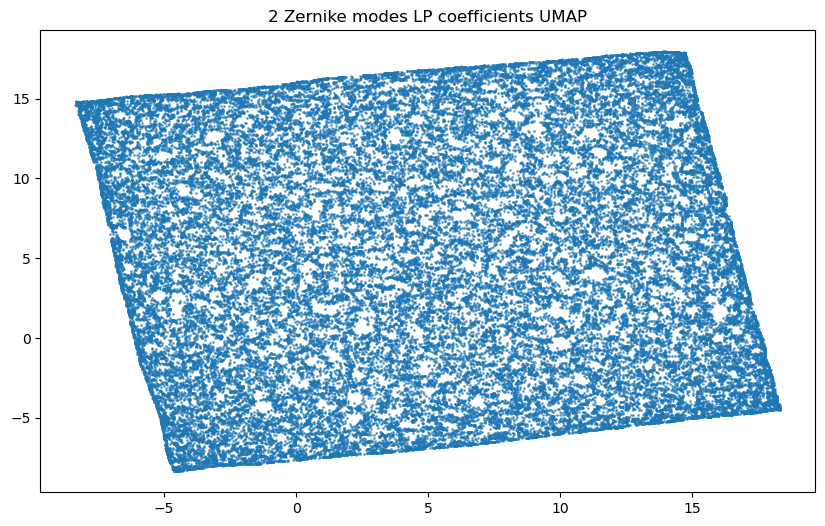

In [20]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_2_data[:, 0], zernike_2_data[:, 1], s=1, alpha=0.6)
plt.title("2 Zernike modes LP coefficients UMAP")
plt.savefig("pid-2mlpumap")

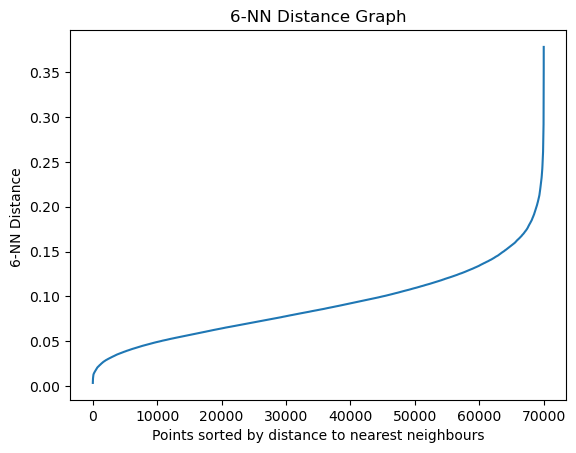

Number of clusters: 1447
[  0   1 662 ... 176 680 280]
Numbers that are not noise: 61313


In [7]:
n_neighbours = 6
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.11
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 58 with 3206 occurrences.
The least repeated label is 1154 with 2 occurrence.
Cluster density mean: 42.37249481686247
Cluster density variance: 157.8672914308962


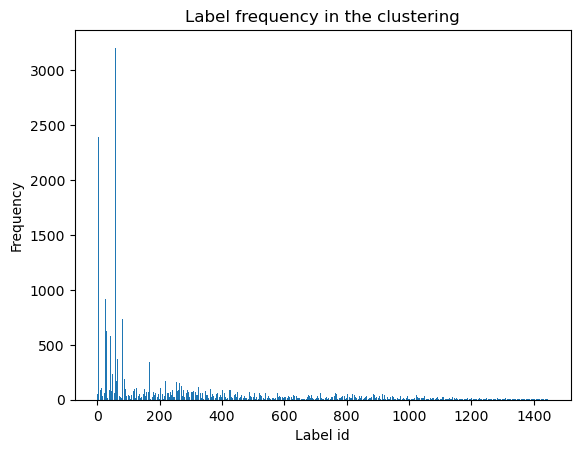

In [8]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

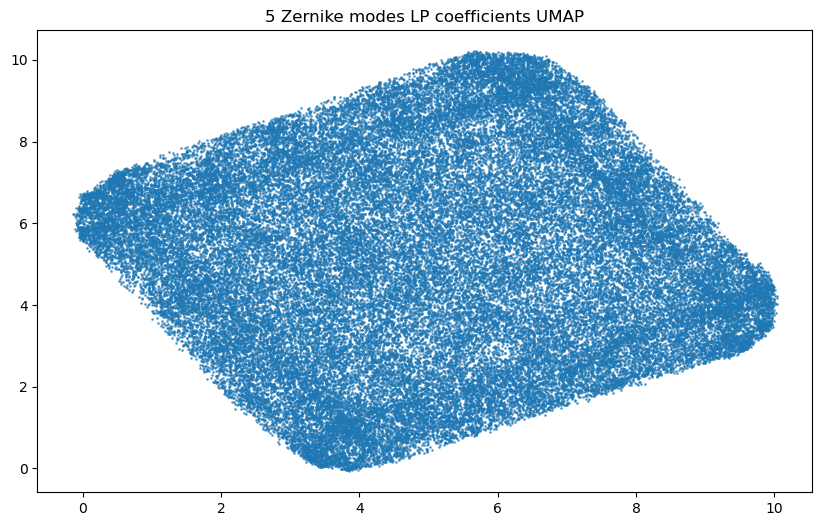

In [21]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_5_data[:, 0], zernike_5_data[:, 1], s=1, alpha=0.6)
plt.title("5 Zernike modes LP coefficients UMAP")
plt.savefig("pid-5mlpumap")

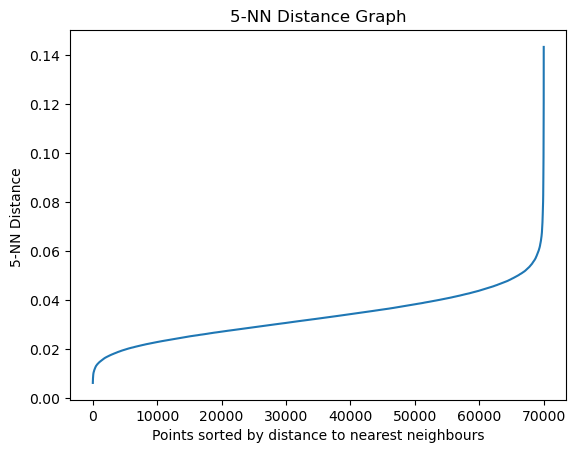

Number of clusters: 1601
[  0   1   2 ...   7 959 210]
Numbers that are not noise: 63120


In [10]:
n_neighbours = 5
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.0385
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 0 with 7737 occurrences.
The least repeated label is 1478 with 2 occurrence.
Cluster density mean: 39.425359150530916
Cluster density variance: 348.2794538445817


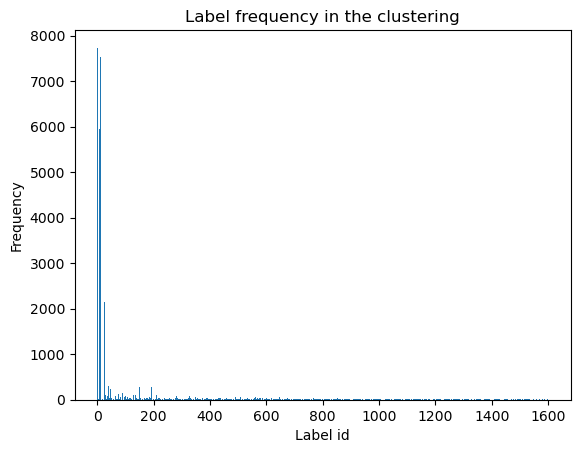

In [11]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

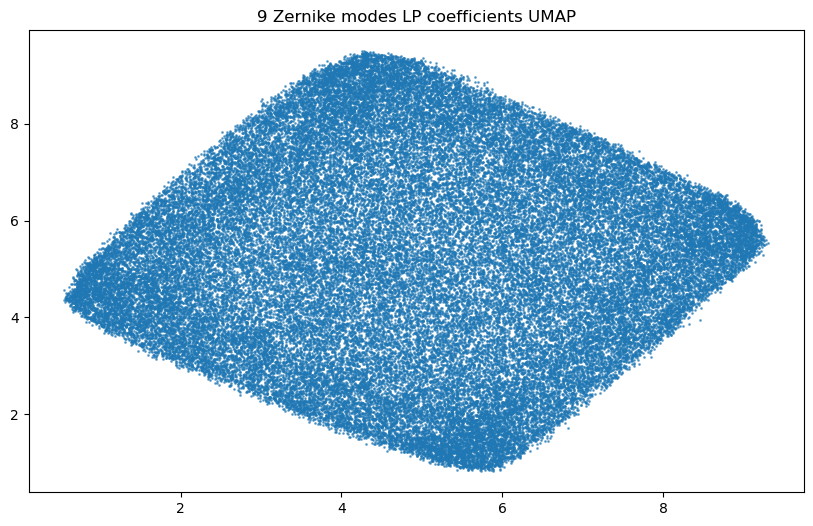

In [22]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_9_data[:, 0], zernike_9_data[:, 1], s=1, alpha=0.6)
plt.title("9 Zernike modes LP coefficients UMAP")
plt.savefig("pid-9mlpumap")

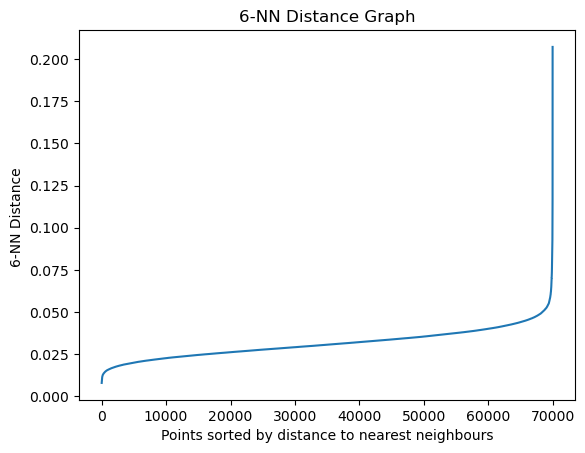

Number of clusters: 1649
[  0   1  71 ...   5   0 117]
Numbers that are not noise: 61106


In [13]:
n_neighbours = 6
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.0335
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 5 with 5280 occurrences.
The least repeated label is 1502 with 1 occurrence.
Cluster density mean: 37.056397816858706
Cluster density variance: 239.01666319531586


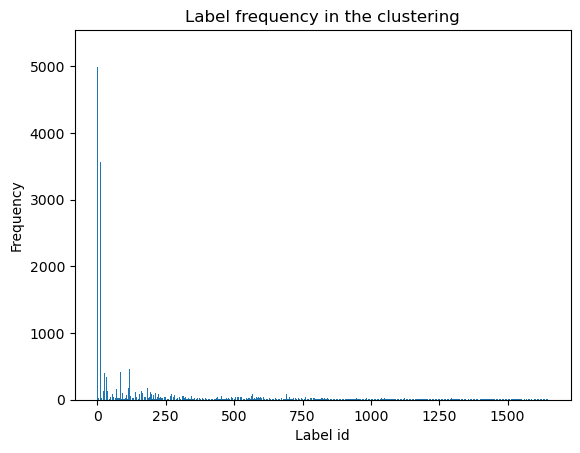

In [14]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

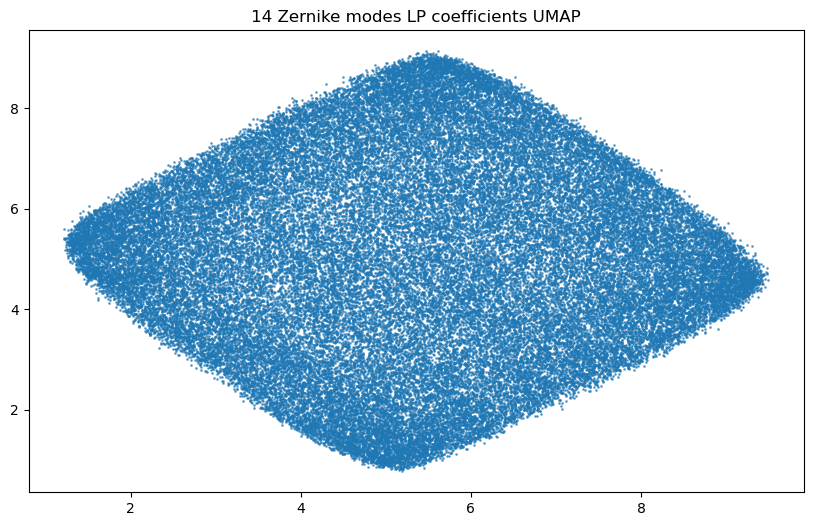

In [23]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_14_data[:, 0], zernike_14_data[:, 1], s=1, alpha=0.6)
plt.title("14 Zernike modes LP coefficients UMAP")
plt.savefig("pid-14mlpumap")

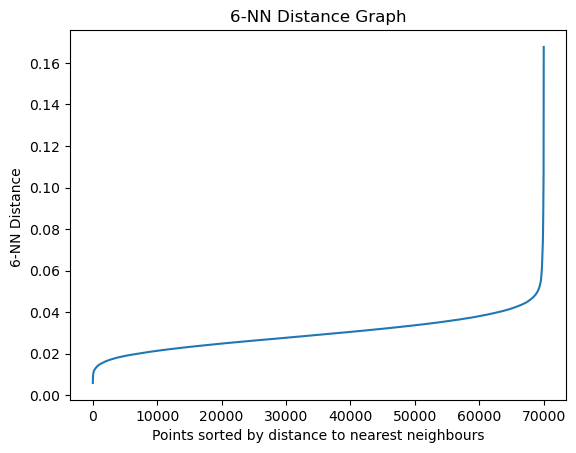

Number of clusters: 1472
[ -1   0 192 ... 457 830   3]
Numbers that are not noise: 61570


In [16]:
n_neighbours = 6
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.0322
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 2 with 6956 occurrences.
The least repeated label is 1163 with 1 occurrence.
Cluster density mean: 41.827445652173914
Cluster density variance: 330.5433317101413


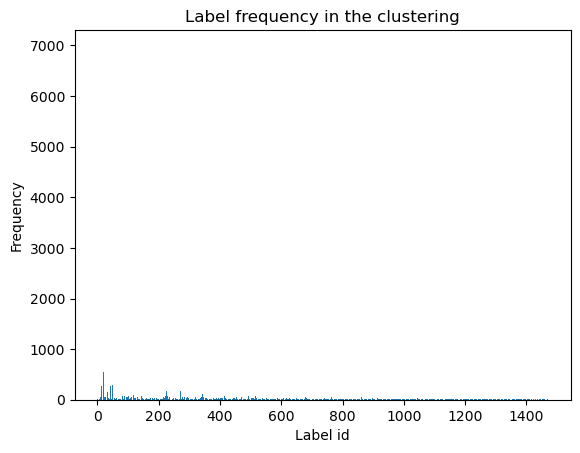

In [17]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

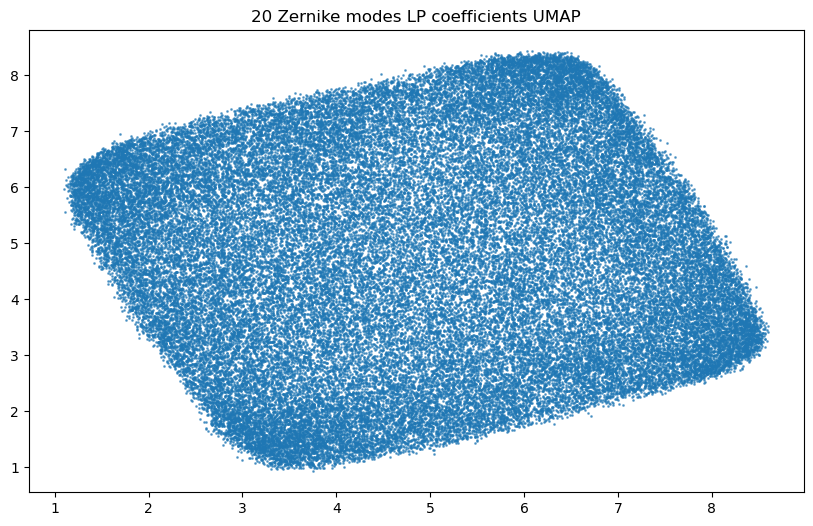

In [24]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_20_data[:, 0], zernike_20_data[:, 1], s=1, alpha=0.6)
plt.title("20 Zernike modes LP coefficients UMAP")
plt.savefig("pid-20mlpumap")

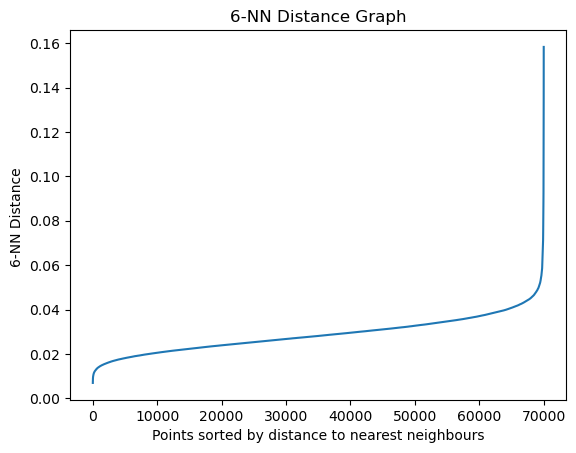

Number of clusters: 1596
[  0   1   2 ...   9 136 435]
Numbers that are not noise: 60804


In [21]:
n_neighbours=6
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.031
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 18 with 7051 occurrences.
The least repeated label is 1593 with 1 occurrence.
Cluster density mean: 38.097744360902254
Cluster density variance: 305.131233067689


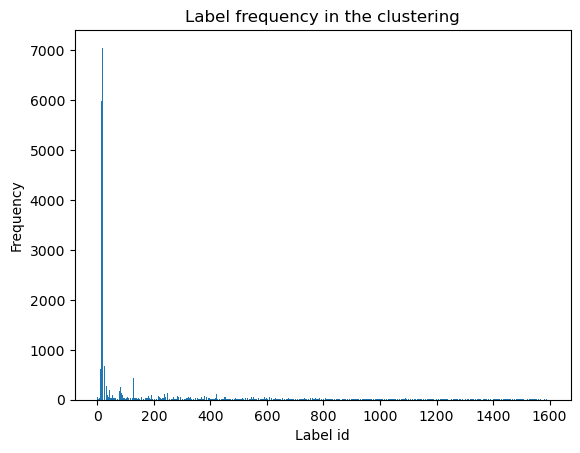

In [22]:
plot_cluster_labels_count(labels_20m)

### Save clusters

In [23]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_LP_COEFFS_FILE_PATH, labels_20m)

# Cluster Low Dimensionality Output Fluxes

In [25]:
from psf_constants import LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH

from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan

import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [26]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH)

### Analysis

#### 2 modes

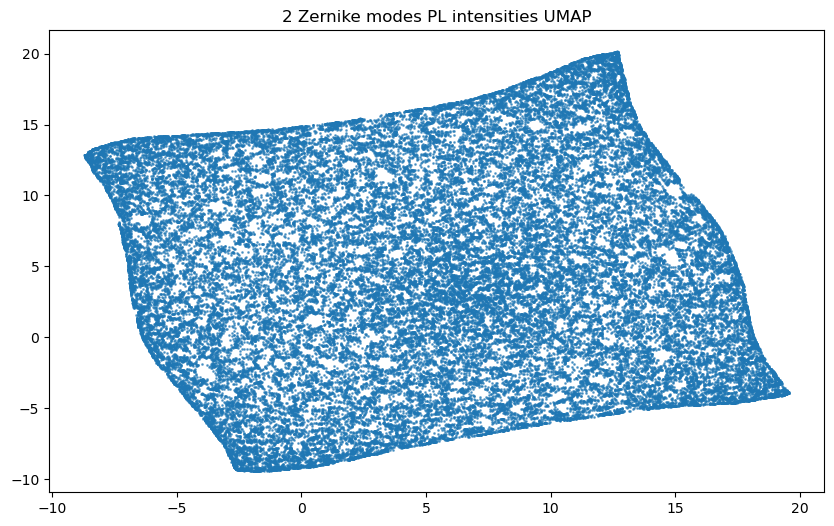

In [27]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_2_data[:, 0], zernike_2_data[:, 1], s=1, alpha=0.6)
plt.title("2 Zernike modes PL intensities UMAP")
plt.savefig("pid-2mplumap")

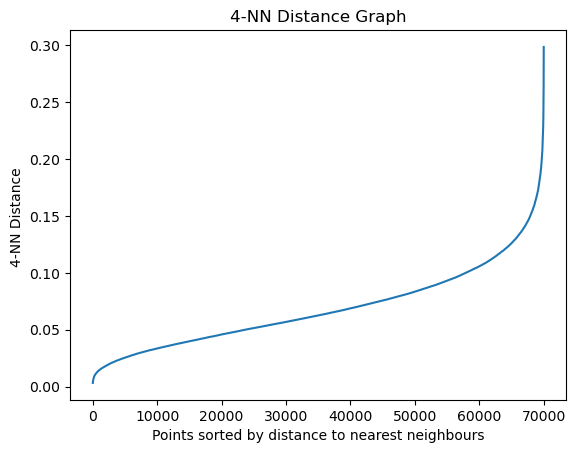

Number of clusters: 1553
[  0   1   2 ... 205 707 304]
Numbers that are not noise: 64594


In [27]:
n_neighbours = 4
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.102
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 53 with 4367 occurrences.
The least repeated label is 1495 with 2 occurrence.
Cluster density mean: 41.593045717965225
Cluster density variance: 188.90940739274205


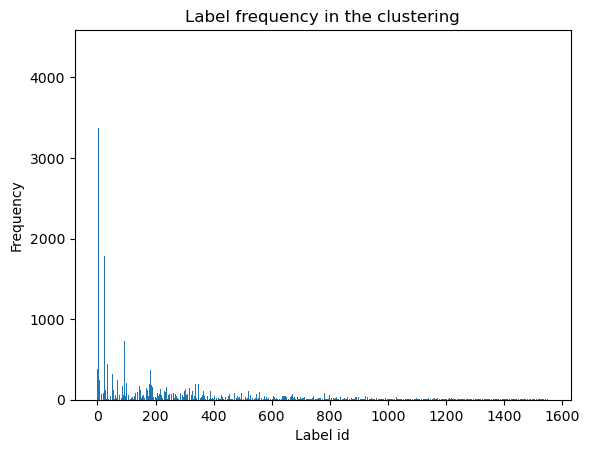

In [28]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

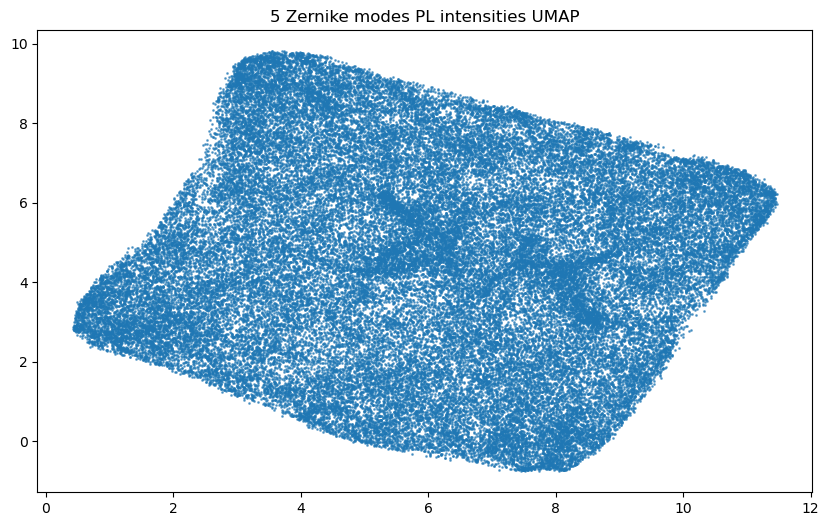

In [28]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_5_data[:, 0], zernike_5_data[:, 1], s=1, alpha=0.6)
plt.title("5 Zernike modes PL intensities UMAP")
plt.savefig("pid-5mplumap")

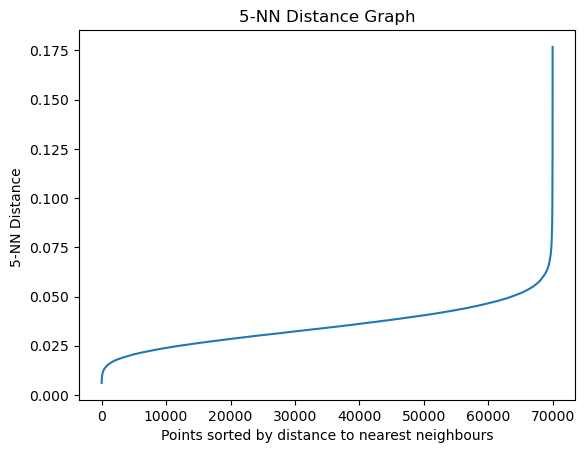

Number of clusters: 1527
[   0 1185    1 ... 1404   -1    9]
Numbers that are not noise: 63266


In [30]:
n_neighbours = 5
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.041
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 3 with 5258 occurrences.
The least repeated label is 1457 with 1 occurrence.
Cluster density mean: 41.43156516044532
Cluster density variance: 273.604780715708


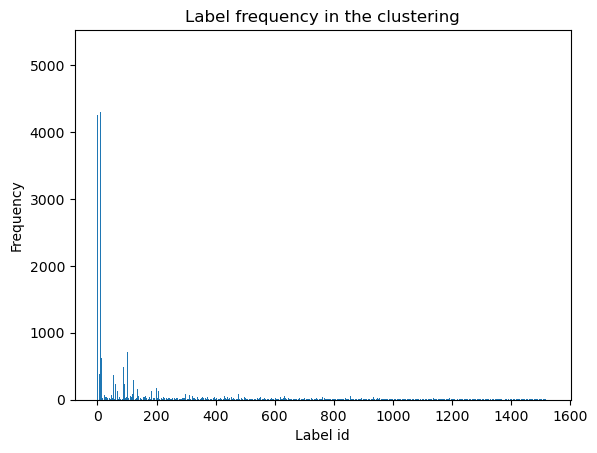

In [31]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

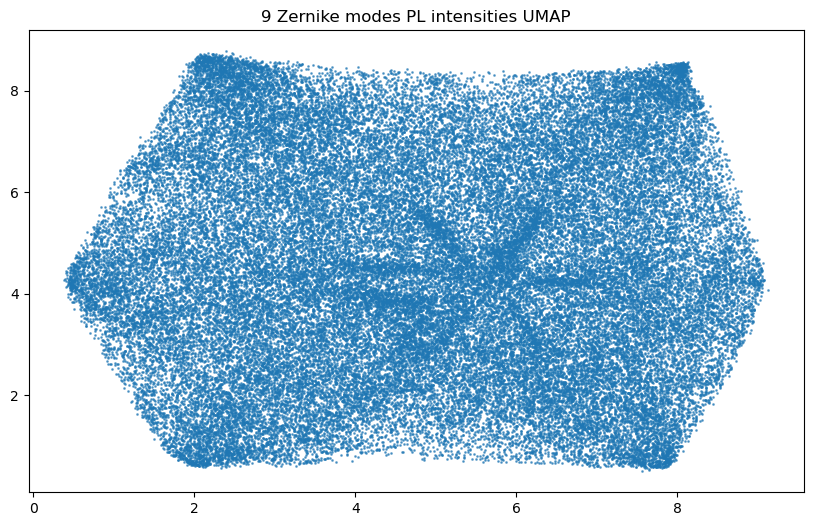

In [29]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_9_data[:, 0], zernike_9_data[:, 1], s=1, alpha=0.6)
plt.title("9 Zernike modes PL intensities UMAP")
plt.savefig("pid-9mplumap")

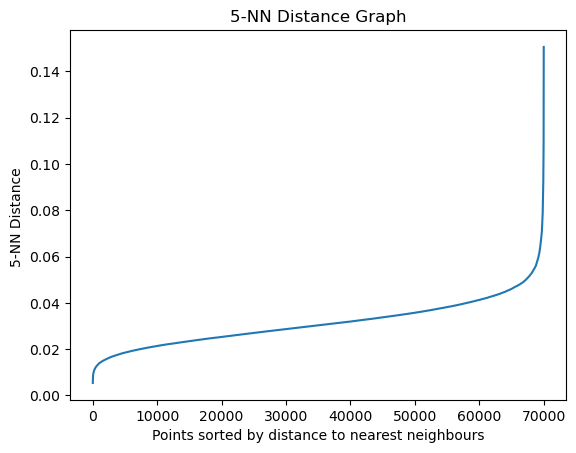

Number of clusters: 1666
[0 1 2 ... 8 0 2]
Numbers that are not noise: 62136


In [33]:
n_neighbours = 5
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.0355
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 2 with 15603 occurrences.
The least repeated label is 1651 with 1 occurrence.
Cluster density mean: 37.29651860744298
Cluster density variance: 403.4964692189433


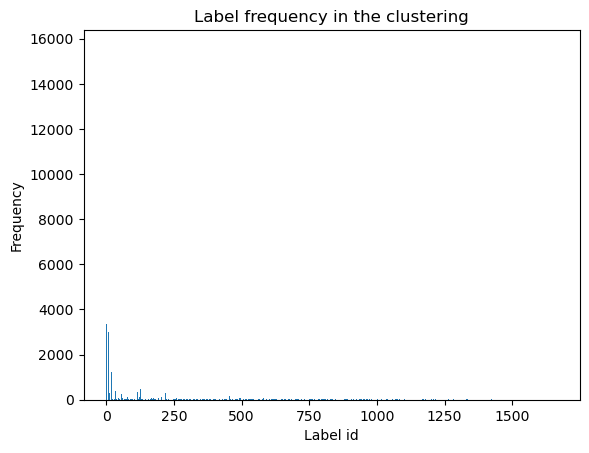

In [34]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

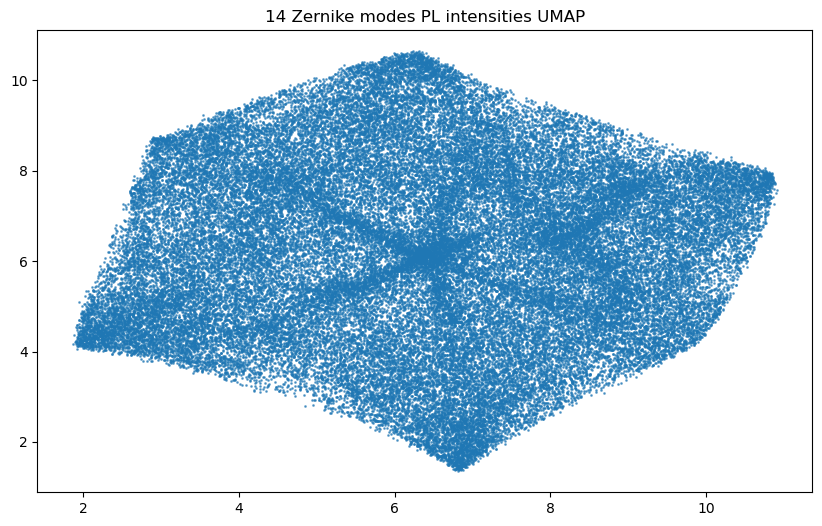

In [30]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_14_data[:, 0], zernike_14_data[:, 1], s=1, alpha=0.6)
plt.title("14 Zernike modes PL intensities UMAP")
plt.savefig("pid-14mplumap")

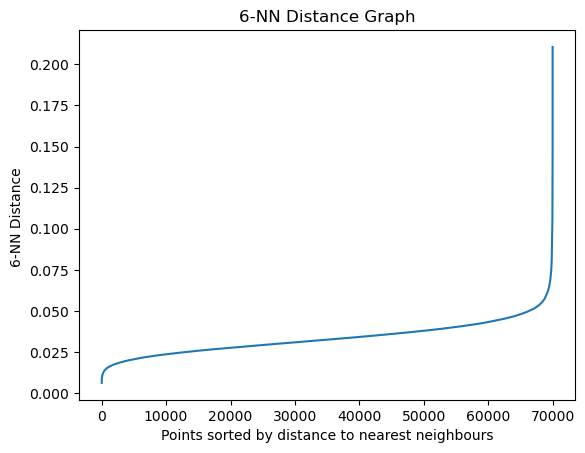

Number of clusters: 1590
[  0  -1  -1 ...   3  92 780]
Numbers that are not noise: 59751


In [36]:
n_neighbours = 6
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.0355
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 3 with 8549 occurrences.
The least repeated label is 1575 with 1 occurrence.
Cluster density mean: 37.57924528301887
Cluster density variance: 322.57904644359934


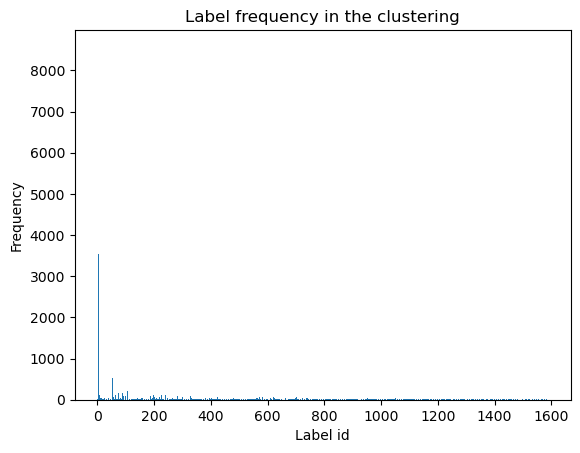

In [37]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

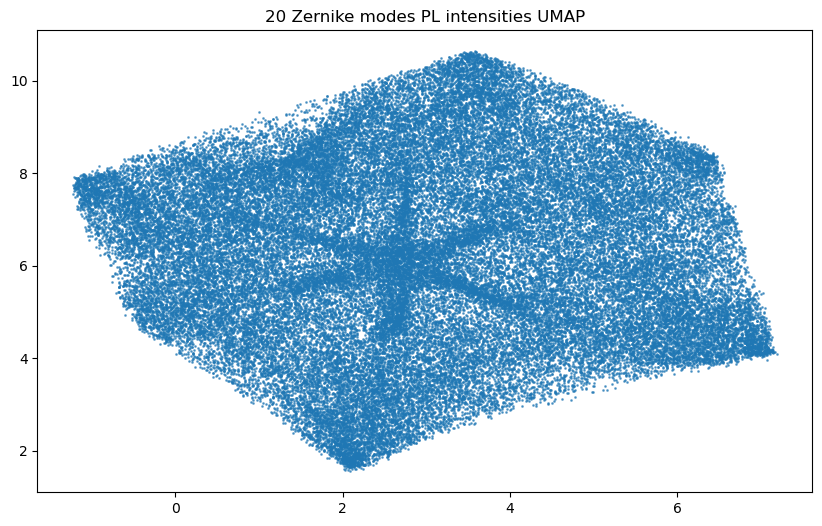

In [31]:
plt.figure(figsize=(10, 6), num=2)
plt.scatter(zernike_20_data[:, 0], zernike_20_data[:, 1], s=1, alpha=0.6)
plt.title("20 Zernike modes PL intensities UMAP")
plt.savefig("pid-20mplumap")

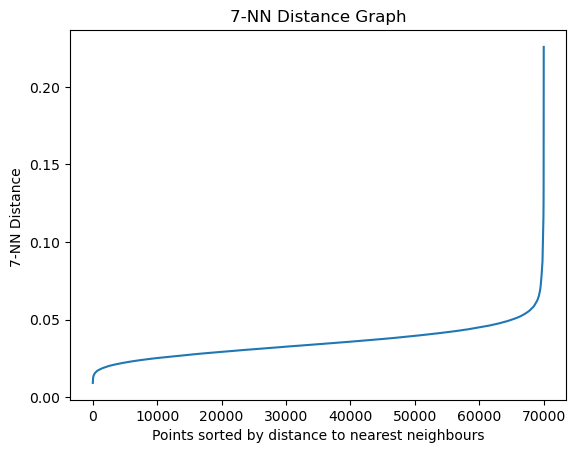

Number of clusters: 1574
[367  -1   0 ... 686  -1 155]
Numbers that are not noise: 55444


In [39]:
n_neighbours = 7
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.0348
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 1 with 7862 occurrences.
The least repeated label is 1500 with 1 occurrence.
Cluster density mean: 35.22490470139771
Cluster density variance: 250.72398394827906


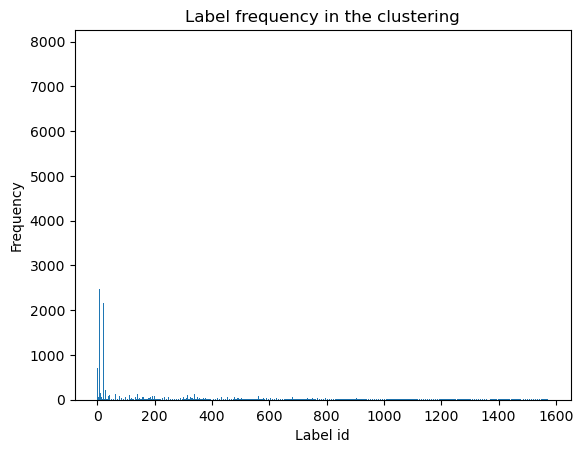

In [40]:
plot_cluster_labels_count(labels_20m)

In [41]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, labels_20m)

# Cluster Low Dimensionality PSF

In [34]:
from psf_constants import LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [35]:
zernike_2_data = np.load(LOW_DIMENSION_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSION_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSION_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSION_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSION_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

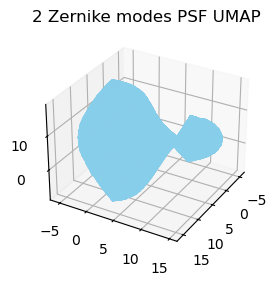

In [49]:
plot_psf_projection(zernike_2_data, 2)

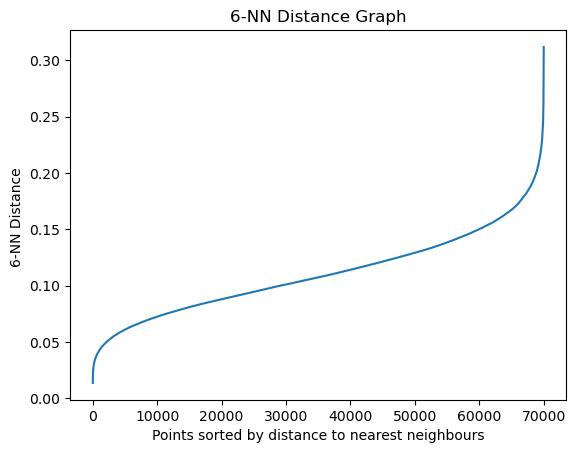

Number of clusters: 1485
[  0   1   2 ... 189 714 291]
Numbers that are not noise: 61665


In [52]:
n_neighbours = 6
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.125
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 28 with 1527 occurrences.
The least repeated label is 1149 with 1 occurrence.
Cluster density mean: 41.525252525252526
Cluster density variance: 90.50184179918094


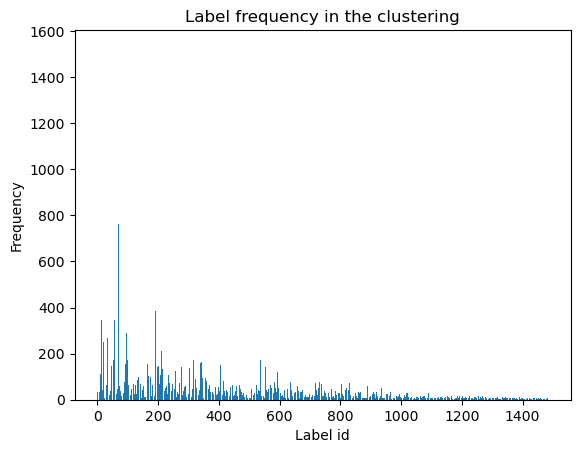

In [53]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

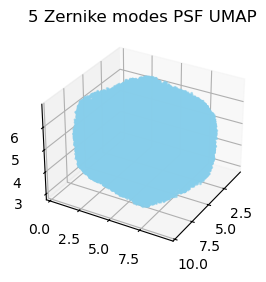

In [50]:
plot_psf_projection(zernike_5_data,5)

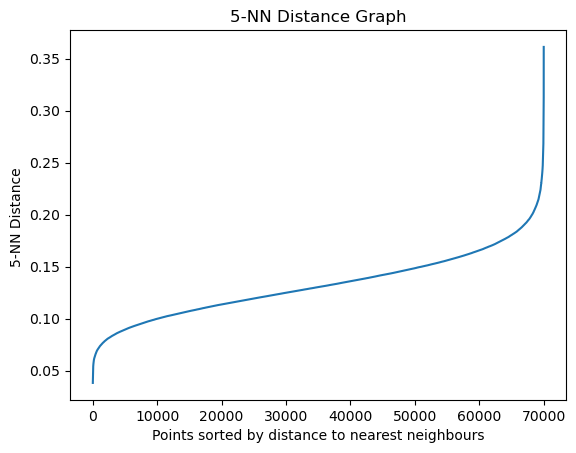

Number of clusters: 1591
[ 0 -1  1 ...  0 -1  0]
Numbers that are not noise: 52509


In [249]:
n_neighbours = 5
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.131
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 0 with 34227 occurrences.
The least repeated label is 1482 with 1 occurrence.
Cluster density mean: 33.00377121307354
Cluster density variance: 857.6775160539922


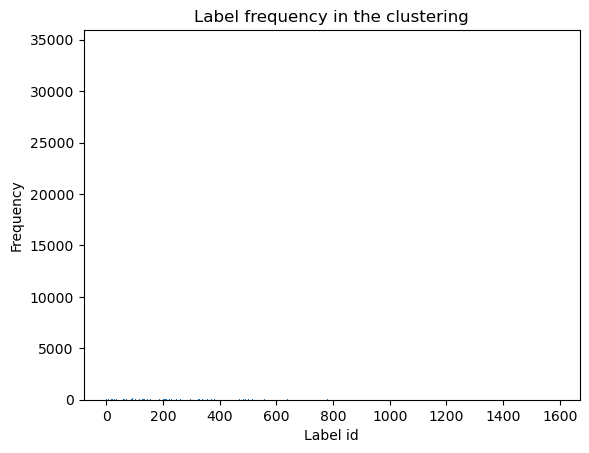

In [250]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

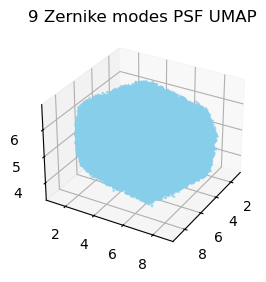

In [51]:
plot_psf_projection(zernike_9_data,9)

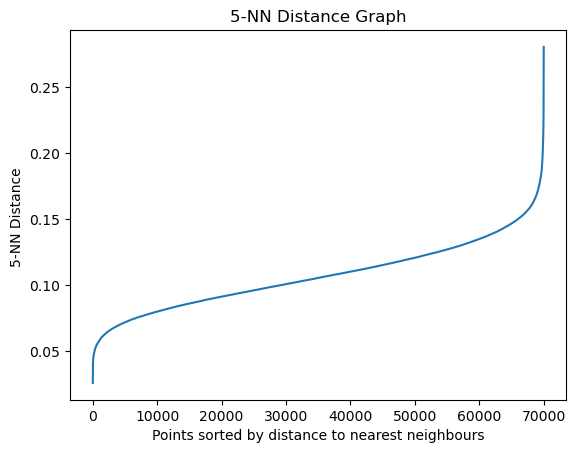

Number of clusters: 1685
[ 0  0  0 ...  0 -1  0]
Numbers that are not noise: 50619


In [241]:
n_neighbours = 5
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.105
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 34629 occurrences.
The least repeated label is 1481 with 1 occurrence.
Cluster density mean: 30.04094955489614
Cluster density variance: 843.205343402261


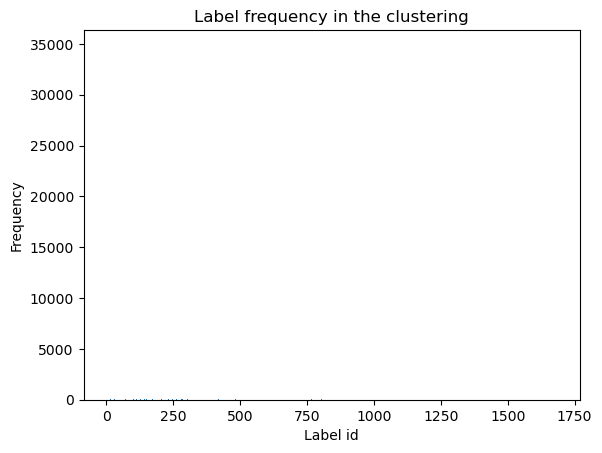

In [242]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

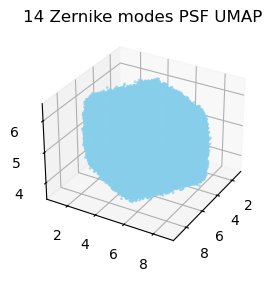

In [52]:
plot_psf_projection(zernike_14_data, 14)

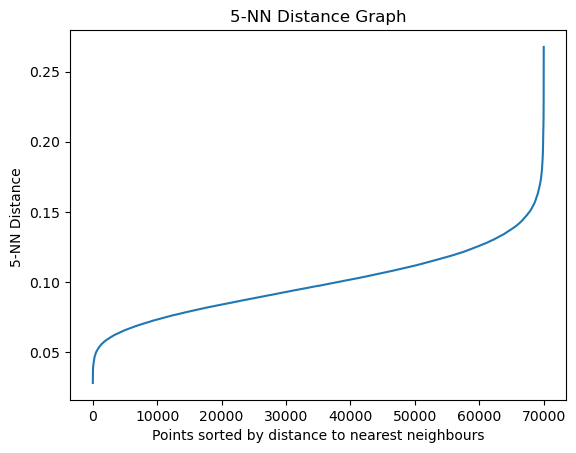

Number of clusters: 1481
[   0    1    2 ...  986 1402    2]
Numbers that are not noise: 53428


In [269]:
n_neighbours = 5
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.1
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 2 with 38442 occurrences.
The least repeated label is 1082 with 1 occurrence.
Cluster density mean: 36.075624577987845
Cluster density variance: 998.3949643036191


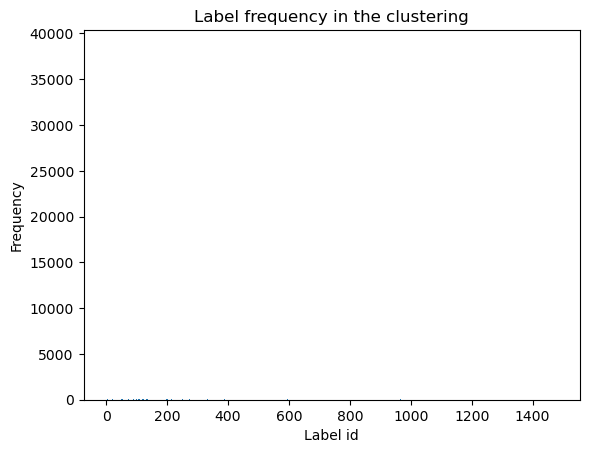

In [270]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

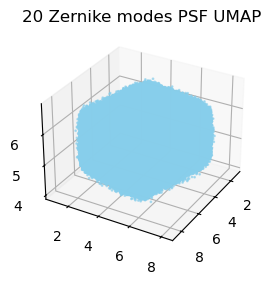

In [53]:
plot_psf_projection(zernike_20_data, 20)

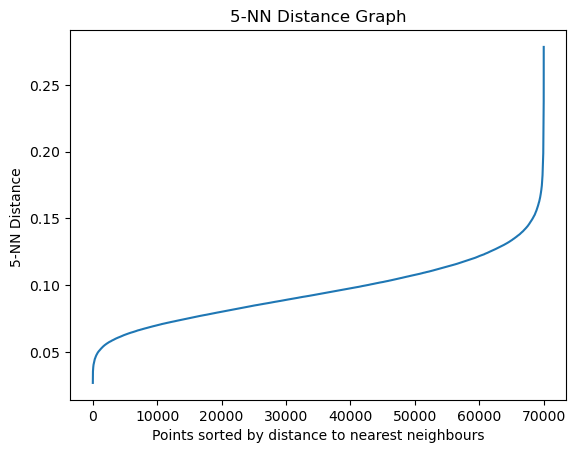

Number of clusters: 1543
[  0   0   1 ... 195   0  -1]
Numbers that are not noise: 51090


In [281]:
n_neighbours = 5
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.094
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 0 with 35575 occurrences.
The least repeated label is 1488 with 1 occurrence.
Cluster density mean: 33.11082307193778
Cluster density variance: 905.1946601049973


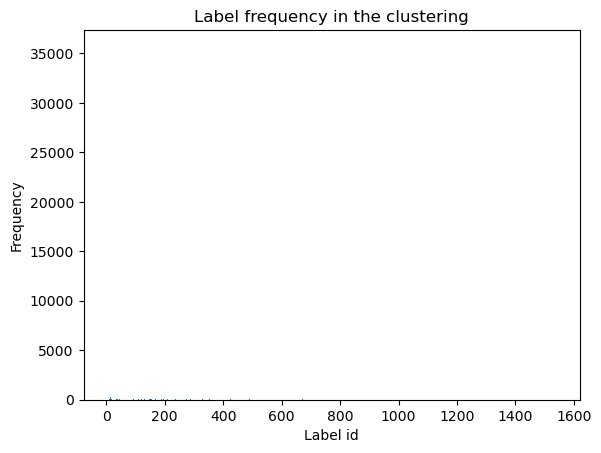

In [282]:
plot_cluster_labels_count(labels_20m)

In [283]:
np.save(CLUSTER_DBSCAN_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_TRAIN_20M_ZERNIKE_PSF_FILE_PATH, labels_20m)

# Cluster Low Dimensionality Predicted PSF

In [1]:
from psf_constants import LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, \
                          CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_FILE_PATH


from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

In [6]:
zernike_2_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_5_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_9_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_14_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)
zernike_20_data = np.load(LOW_DIMENSIONALITY_PREDICTED_TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH)

#### 2 modes

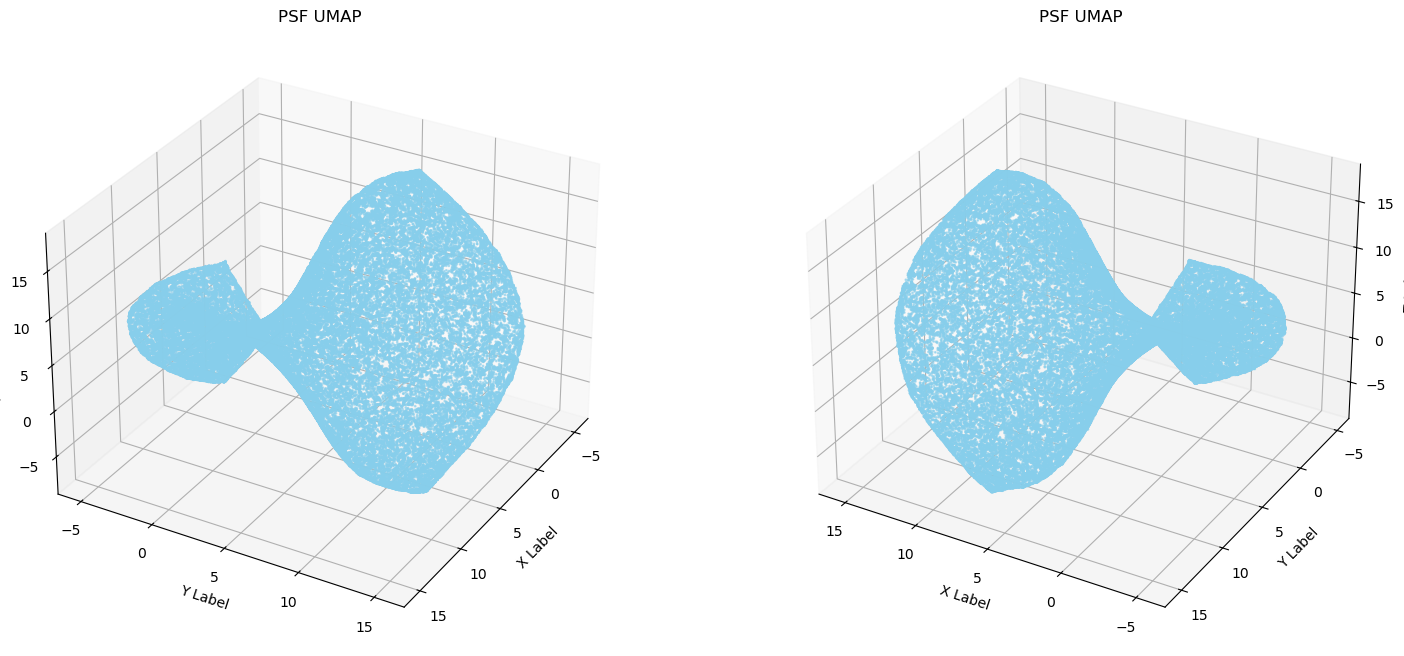

In [7]:
plot_psf_projection(zernike_2_data)

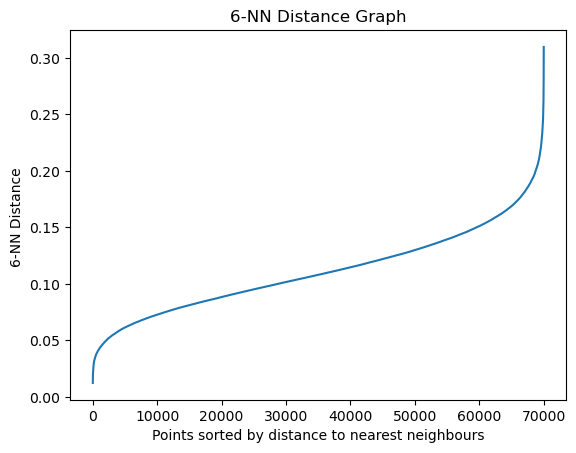

Number of clusters: 1528
[  0   1   2 ... 194 752 299]
Numbers that are not noise: 61427


In [12]:
n_neighbours = 6
plot_kneighbours(zernike_2_data, n_neighbours)
epsilon = 0.125
labels_2m = get_number_of_clusters(zernike_2_data, epsilon, n_neighbours)

The most repeated label is 26 with 1501 occurrences.
The least repeated label is 1307 with 1 occurrence.
Cluster density mean: 40.200916230366495
Cluster density variance: 87.57165846124343


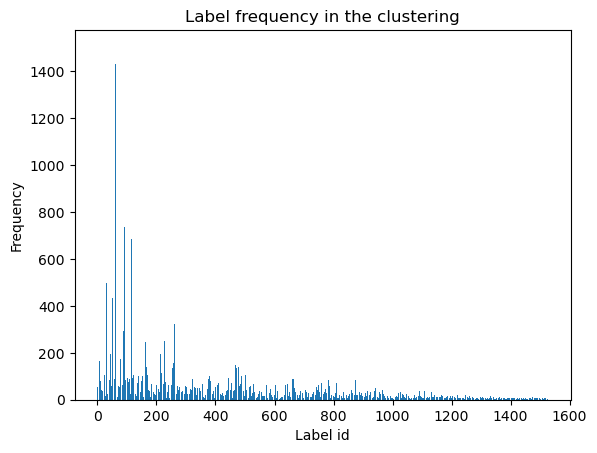

In [13]:
plot_cluster_labels_count(labels_2m)

#### 5 modes

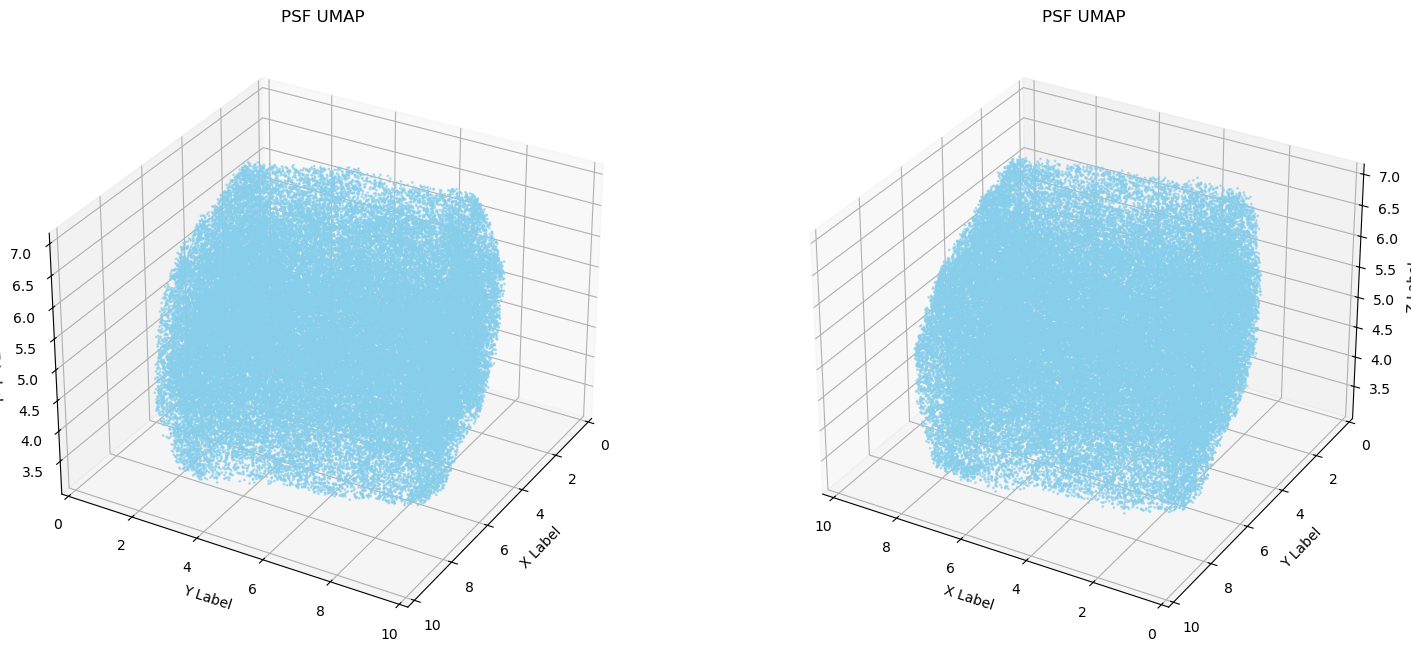

In [15]:
plot_psf_projection(zernike_5_data)

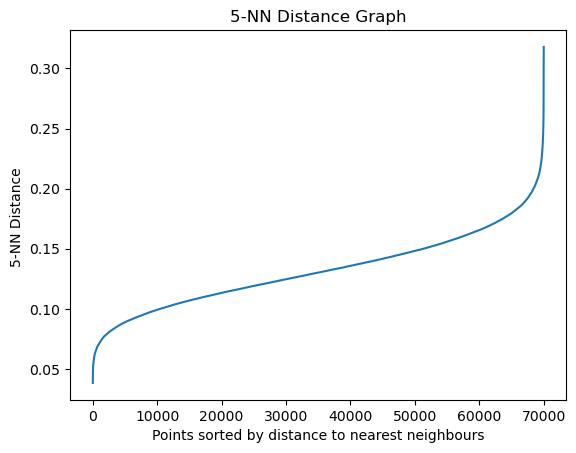

Number of clusters: 1681
[ 0 -1 -1 ...  0 37  0]
Numbers that are not noise: 52719


In [16]:
n_neighbours = 5
plot_kneighbours(zernike_5_data, n_neighbours)
epsilon = 0.131
labels_5m = get_number_of_clusters(zernike_5_data, epsilon, n_neighbours)

The most repeated label is 0 with 34660 occurrences.
The least repeated label is 1360 with 1 occurrence.
Cluster density mean: 31.36168947055324
Cluster density variance: 844.9982678272507


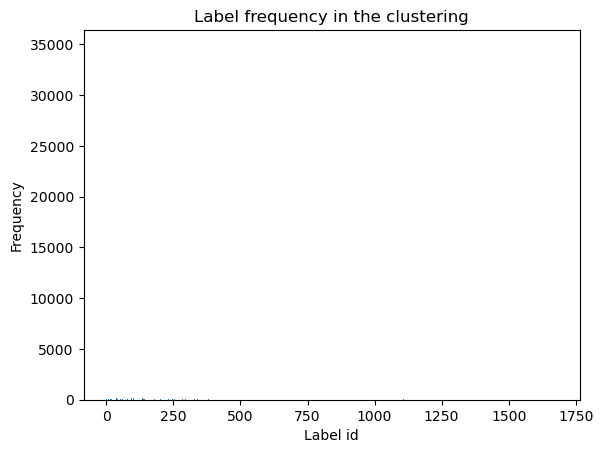

In [17]:
plot_cluster_labels_count(labels_5m)

#### 9 modes

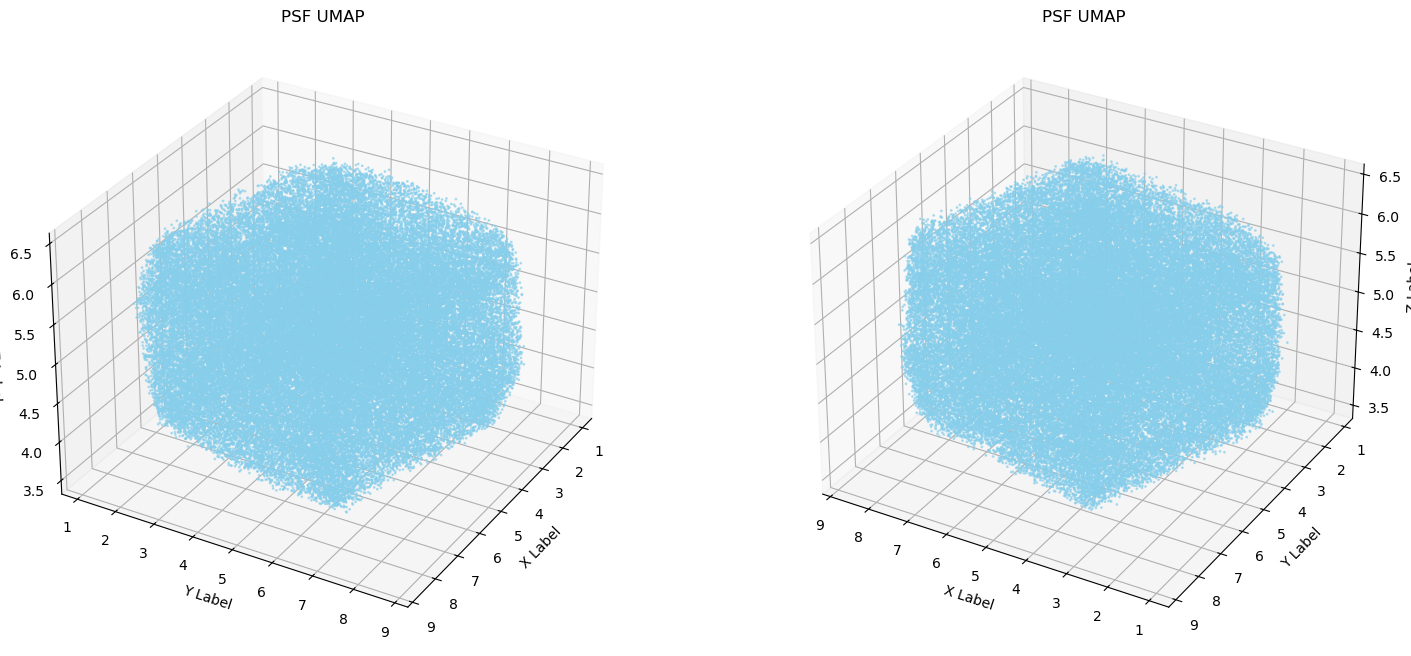

In [18]:
plot_psf_projection(zernike_9_data)

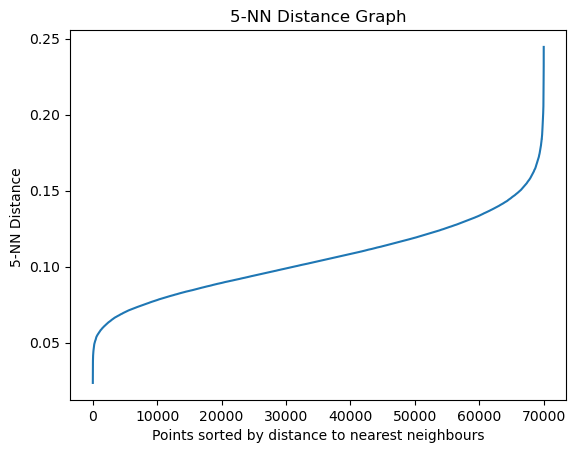

Number of clusters: 1628
[0 0 0 ... 0 0 0]
Numbers that are not noise: 52024


In [21]:
n_neighbours = 5
plot_kneighbours(zernike_9_data, n_neighbours)
epsilon = 0.105
labels_9m = get_number_of_clusters(zernike_9_data, epsilon, n_neighbours)

The most repeated label is 0 with 36354 occurrences.
The least repeated label is 1404 with 1 occurrence.
Cluster density mean: 31.955773955773957
Cluster density variance: 900.5339307610343


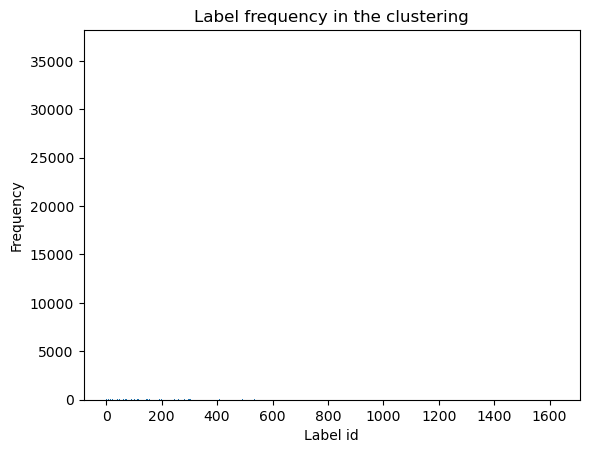

In [22]:
plot_cluster_labels_count(labels_9m)

#### 14 modes

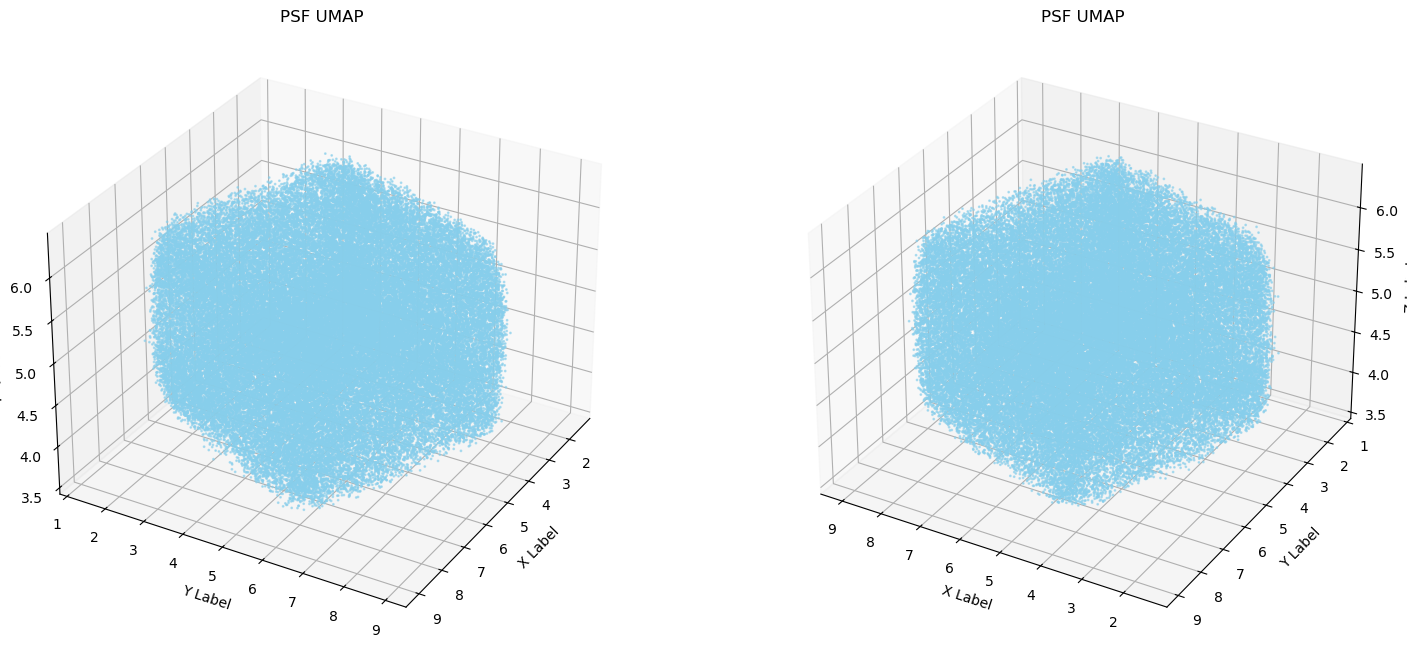

In [24]:
plot_psf_projection(zernike_14_data)

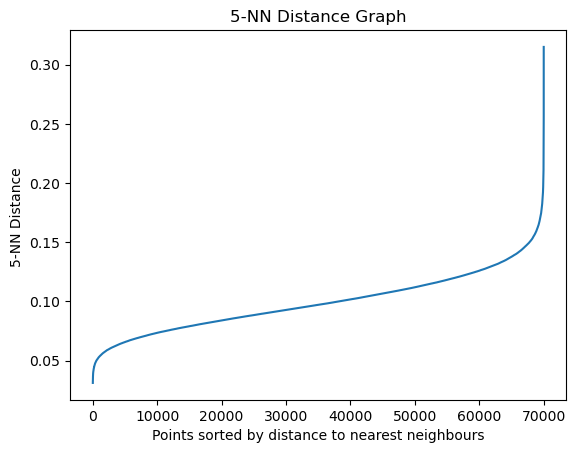

Number of clusters: 1467
[-1  0  0 ... -1 -1  0]
Numbers that are not noise: 53265


In [25]:
n_neighbours = 5
plot_kneighbours(zernike_14_data, n_neighbours)
epsilon = 0.1
labels_14m = get_number_of_clusters(zernike_14_data, epsilon, n_neighbours)

The most repeated label is 0 with 38845 occurrences.
The least repeated label is 1115 with 1 occurrence.
Cluster density mean: 36.30879345603272
Cluster density variance: 1013.6463020075907


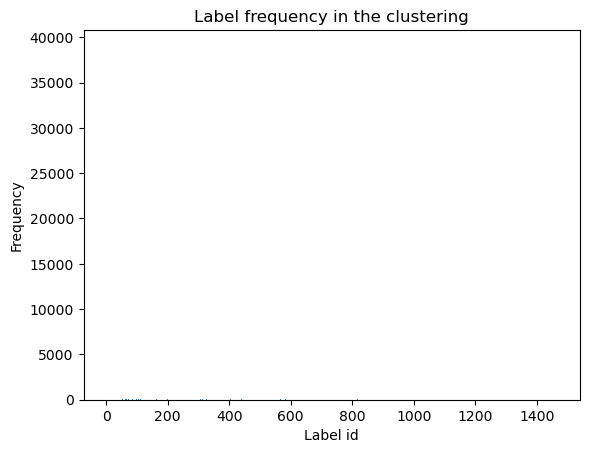

In [26]:
plot_cluster_labels_count(labels_14m)

#### 20 modes

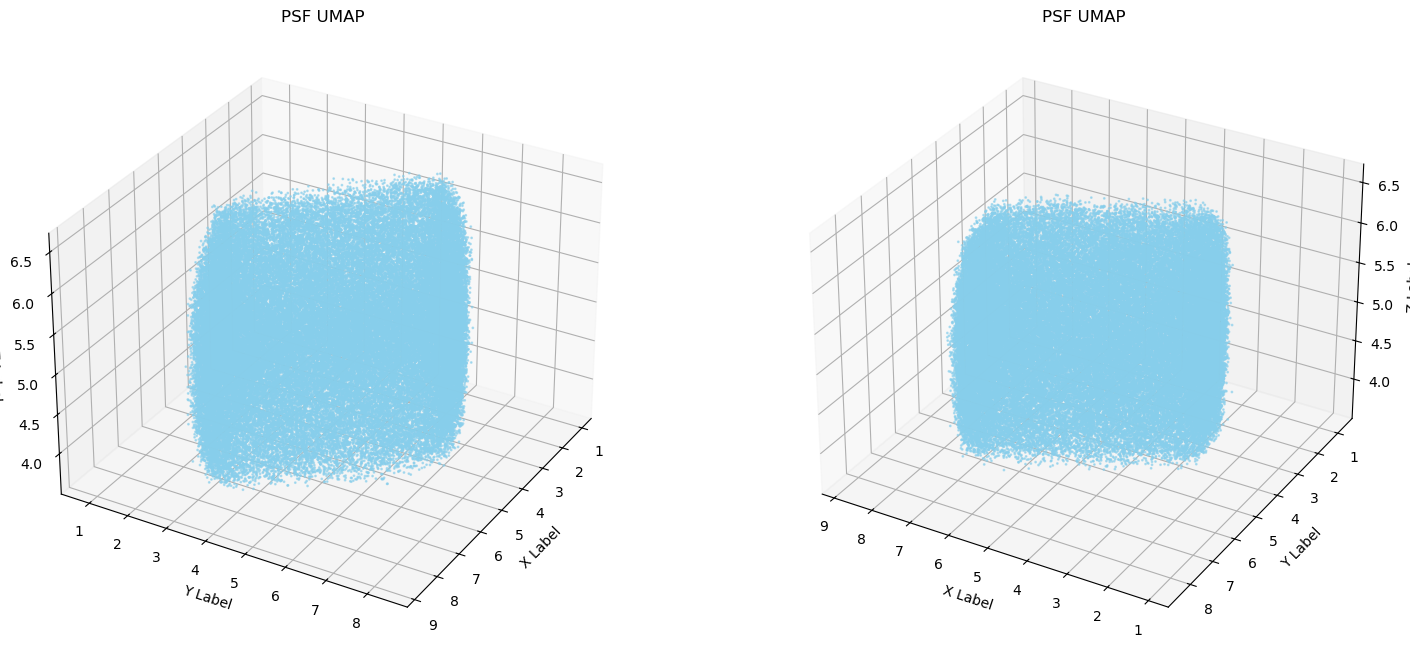

In [27]:
plot_psf_projection(zernike_20_data)

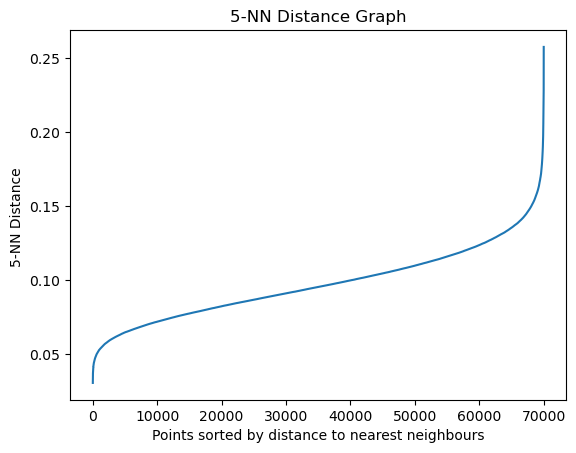

Number of clusters: 1702
[  0   2   1 ...  -1   2 965]
Numbers that are not noise: 48941


In [30]:
n_neighbours = 5
plot_kneighbours(zernike_20_data, n_neighbours)
epsilon = 0.094
labels_20m = get_number_of_clusters(zernike_20_data, epsilon, n_neighbours)

The most repeated label is 2 with 33451 occurrences.
The least repeated label is 1633 with 1 occurrence.
Cluster density mean: 28.754994124559342
Cluster density variance: 810.4065404296666


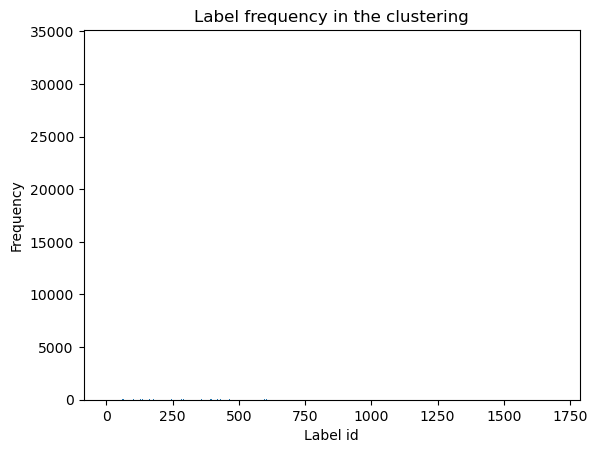

In [31]:
plot_cluster_labels_count(labels_20m)

In [32]:
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_2M_ZERNIKE_PSF_FILE_PATH, labels_2m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_5M_ZERNIKE_PSF_FILE_PATH, labels_5m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_9M_ZERNIKE_PSF_FILE_PATH, labels_9m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_14M_ZERNIKE_PSF_FILE_PATH, labels_14m)
np.save(CLUSTER_DBSCAN_PREDICTED_TRAIN_20M_ZERNIKE_PSF_FILE_PATH, labels_20m)